<a href="https://colab.research.google.com/github/beifa/ML-models/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

### Magnitude or length vector

We call norm ||x||, use Pythagorean theorem:
hypotenuse = ab
cathet = ac and bc
$$ ab^2 = ac^2 + bc^2  $$
$$ ab^2 = \sum(ac^2, bc^2) $$
$$ ab = \sqrt\sum(ac, bc)$$
$$ ||ab|| = ab = \sqrt\sum(ac, bc)$$





In [0]:
#Magnitude or length vector
"""
1*1 + 2*2 = 1 + 4= 5, sqrt5
"""
x = [1,2]
np.linalg.norm(x)

2.23606797749979

### Direction vector

In [0]:
direction = x / np.linalg.norm(x)
direction

array([0.4472136 , 0.89442719])

### Dot product

$$x * y = ||x||*||y||*\cos(\theta)$$



In [0]:
a = np.array([5, 3])
b = np.array([7, 2])

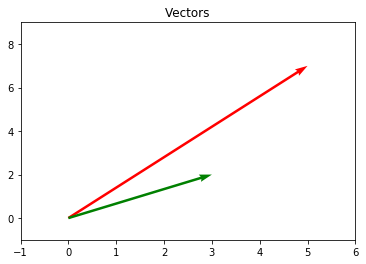

In [0]:
plt.quiver([0, 0], [0, 0], a, b, angles='xy', scale_units='xy', scale=1, color= ['r', 'g'])
plt.xlim(-1, 6)
plt.ylim(-1, 9)
plt.title('Vectors');

In [0]:
a_norm = np.linalg.norm(a)
b_norm = np.linalg.norm(b)
angle = np.dot(a,b) / a_norm / b_norm
angle = math.acos(angle)#radians
#theta = angle * 360 / 2 / np.pi
print('angle: ', theta)
a_norm * b_norm * math.cos(angle)

angle:  45.00000000000001


41.0

In [0]:
np.dot(a, b)

41

### Hyperplane

In [0]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [0]:
idx = np.where(y ==2)
#i need first elemet for split only two class
second_element = idx[0][0]
X= X[:second_element]
y = y[:second_element]

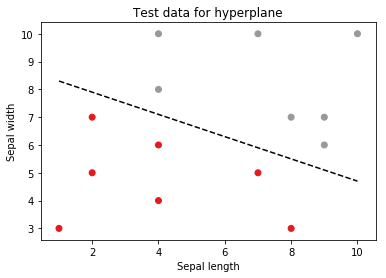

In [0]:
def plot_hyperplane(X, y, min_x, max_x, title, w, svm = False):
    """
    plot hyperline on iris data and we use sklern.svm
    
    """    
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    
    if svm:
      clf = SVC(kernel = 'linear').fit(X,y)      
      w = clf.coef_[0]
      a = -w[0] / w[1]
      x = np.linspace(min_x, max_x)  # make line
      yy = a * x - (clf.intercept_[0]) / w[1]
    else:      
      b=w[0]    
      x = np.linspace(min_x, max_x)
      yy = -(w[1] * x + b)/w[2]

    plt.plot(x, yy, 'k--')
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Set1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title);

plot_hyperplane(X,y, min_x, max_x, 'Test data for hyperplane', w, svm = True)

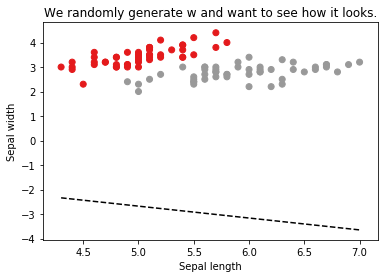

In [0]:
w = np.random.rand(3)
plot_hyperplane(X, y, min_x, max_x, 'We randomly generate w and want to see how it looks.', w, svm = False)

#### The Perceptron algorithm


PLA - очень простой алгоритм, который можно обобщить следующим образом:
1. Начните со случайной гиперплоскости (определяемой вектором) и используйте ее для классификации данных.
2. Выберите неверно классифицированный пример и выберите другую гиперплоскость, обновив значение,
надеясь, что это поможет лучше классифицировать этот пример (это называется правилом обновления).
3. Классифицируйте данные с помощью этой новой гиперплоскости.
4. Повторяйте шаги 2 и 3 до тех пор, пока не будет ошибочно рассмотренного примера.
После завершения процесса у вас появляется гиперплоскость, разделяющая данные.



$$h(x_i) = sign(w * x_i)$$

w random

make predict and return error

-while (list of errors and we loop it
         update removes incorrectly
         classified values)

         randomly from the list we take the value we find its index
         and return the value and its label

         update (w)

         run the predicate again, which in theory should reduce the list
         until it is empty
return w

In [0]:
X_intercept = np.c_[np.ones(X.shape[0]), X]

In [0]:
#вот я затупок, а читать к то будет че делает sign
#change y =0 to y = -1
y_change = y.copy()
y_change = np.where(y != 0, y_change, -1)

In [0]:
def hypo(X,w):
  return np.sign(np.dot(w, X.T))

def predict(X, y, w):
  pred = hypo(X, w)  
  error_list = X[pred != y]  
  return error_list

def one(X, y, error):
  """
  return row and y
  
  """
  np.random.shuffle(error) 
  x = error[0]
  index = np.where(np.all(X==x, axis=1))
  return x, y[index]


In [0]:
def p_algoritm(X, y):
  w = np.random.rand(X.shape[1])#intercept
  #i need error classification examples
  error_class = predict(X, y, w)  
  while error_class.any():
    #loop if not epmty
    #1
    x, y_valid = one(X, y, error_class)
    #2 change w    
    w = w + x * y_valid[0]
    #   
    error_class = predict(X, y, w)

  return w

w = p_algoritm(X_intercept, y_change)

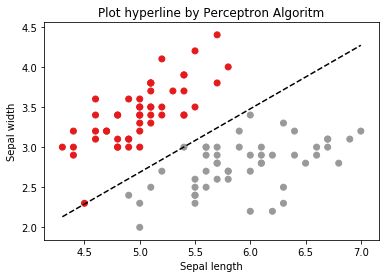

In [0]:
plot_hyperplane(X, y, min_x, max_x, 'Plot hyperline by Perceptron Algoritm', w, svm = False)

#### Plot support line

Text(0.5, 1.0, 'Plot by sklearn.SVM Support Line')

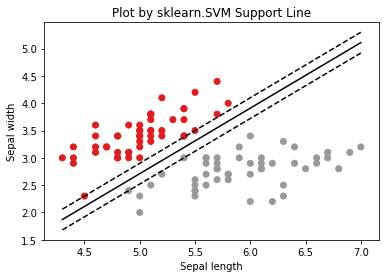

In [0]:
clf = SVC(C =100, kernel = 'linear').fit(X,y)

w = clf.coef_[0]
a = -w[0] / w[1]
x = np.linspace(min_x, max_x)  # make line
yy = a * x - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
yy_down = a * x + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * x + (b[1] - a * b[0])
"""
вот, а почему линии проходят по значениям, везде написано что так нельзя
"""
plt.plot(x, yy, 'k-')
plt.plot(x, yy_down, 'k--')
plt.plot(x, yy_up, 'k--')

plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Plot by sklearn.SVM Support Line')


SVM, насколько вы хотите избежать неправильной классификации каждого примера обучения. При больших значениях C оптимизация выберет гиперплоскость с меньшим запасом, если эта гиперплоскость лучше справится с правильной классификацией всех тренировочных точек. И наоборот, очень маленькое значение C заставит оптимизатор искать разделительную гиперплоскость с большим запасом, даже если эта гиперплоскость неправильно классифицирует больше точек. Для очень маленьких значений C вы должны получить неправильно классифицированные примеры, часто даже если ваши обучающие данные линейно разделимы.

In [0]:
clf.support_vectors_

array([[4.9, 3. ],
       [5.7, 3.8],
       [5.4, 3.4],
       [5. , 3. ],
       [5.4, 3.4],
       [5.5, 3.5],
       [4.5, 2.3],
       [4.8, 3. ],
       [4.9, 2.4],
       [5.2, 2.7],
       [5.6, 3. ],
       [5.9, 3.2],
       [5.4, 3. ],
       [6. , 3.4],
       [5.6, 3. ],
       [5.1, 2.5]])

In [0]:
#margin = 2 / ||w||?, but very small
margin = 2 / np.linalg.norm(w)
margin

0.013005562251862009

In [0]:
"""
не уверен я, что должны быть такие линни(узкий коридор), но с другой стороны тут нет оптимизации и даже видно , что можно лучше сделать плоскость
но цель в правильной классификации и так сказать плоскости которую потом как я понимаю за счет оптимизации можно сделать лучше
"""
plt.figure(figsize=(10, 10))
b=w[0]    
x = np.linspace(min_x, max_x)
yy = -(w[1] * x + b)/w[2]
plt.plot(x, yy, 'k--')
plt.plot(x, yy + margin, 'r-')
plt.plot(x, yy - margin, 'b-')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Set1);

In [0]:
"""
можно посмотреть как прошла классификация
"""
hypo(X_intercept, w)